In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")

# Data Prepocessing

## Some data should be numeric data, but its character type.

In [3]:
numer_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']


cat_cols=['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

### There is no NA, but is "?"

In [4]:
data = data.replace("?", np.NaN)
for i in numer_cols:
    data[i] = data[i].astype(float)

## There are some columns that should be numeric, but it's character here. Like: "3"
### Need to Transfer

In [5]:
data[i].astype(float)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
853    0.0
854    0.0
855    0.0
856    0.0
857    0.0
Name: STDs (number), Length: 858, dtype: float64

In [6]:
for i in cat_cols:
    data[i] = data[i].astype("str").astype(float)
    
data["STDs: Time since first diagnosis"] = data["STDs: Time since first diagnosis"].astype("str").astype(float)
data["STDs: Time since last diagnosis"] = data["STDs: Time since last diagnosis"].astype("str").astype(float)

## Drop off STDs: Time since first diagnosis and STDs: Time since last diagnosis 
There are too many NA

In [7]:
data.drop(['STDs: Time since last diagnosis','STDs: Time since first diagnosis'],inplace=True,axis=1)


# Data Visualization 1 

In [8]:
import seaborn as sns

In [9]:
df = data.dropna() ## Drop off NA in categarical Datasets

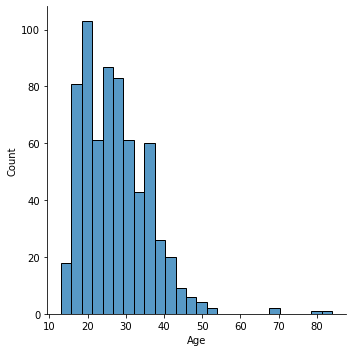

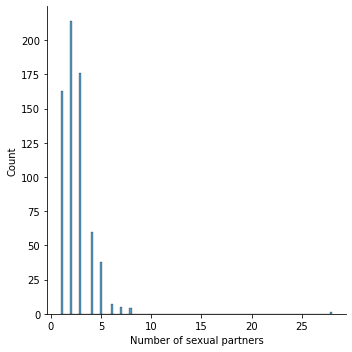

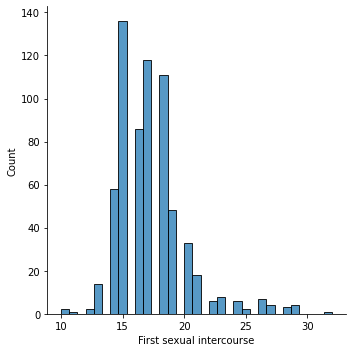

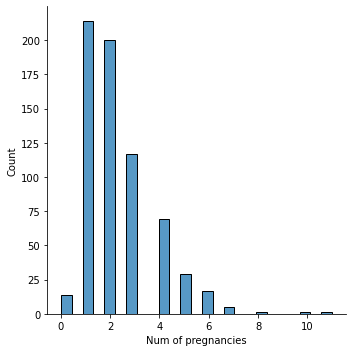

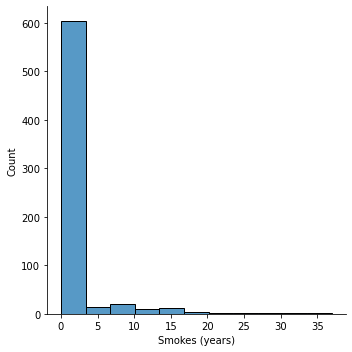

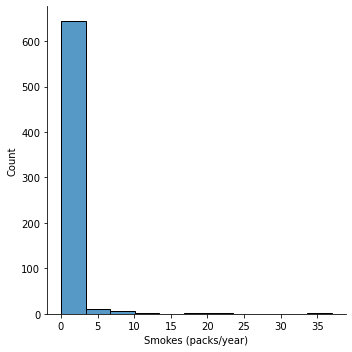

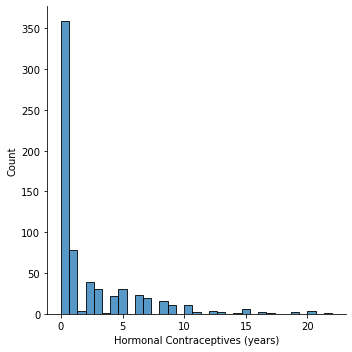

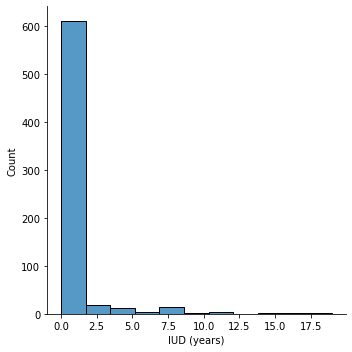

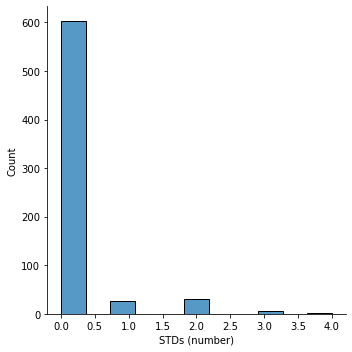

In [10]:
for i in numer_cols:
    sns.displot(x = df[i], kind = 'hist')

## Data Visualization 2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


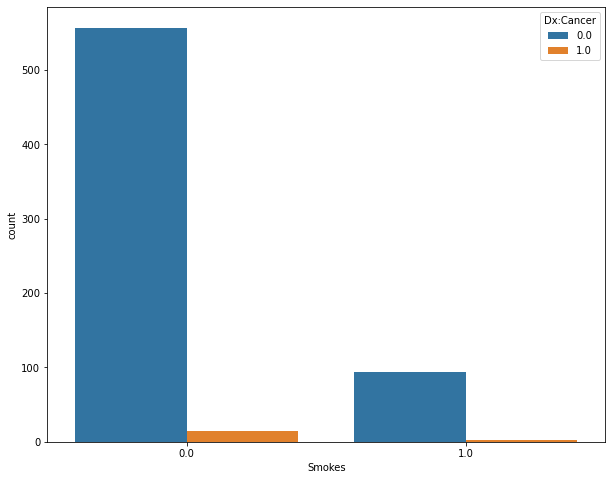

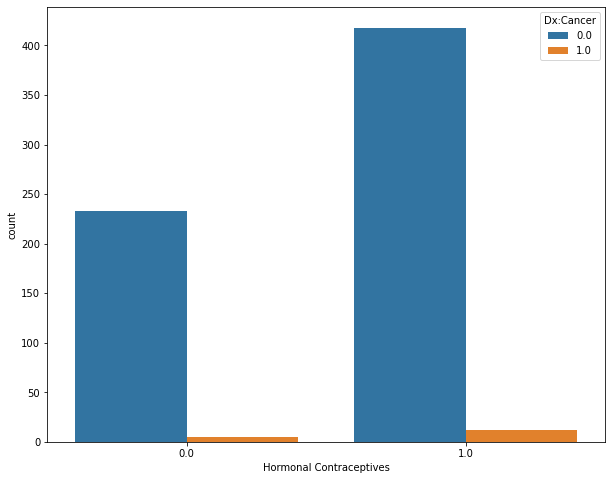

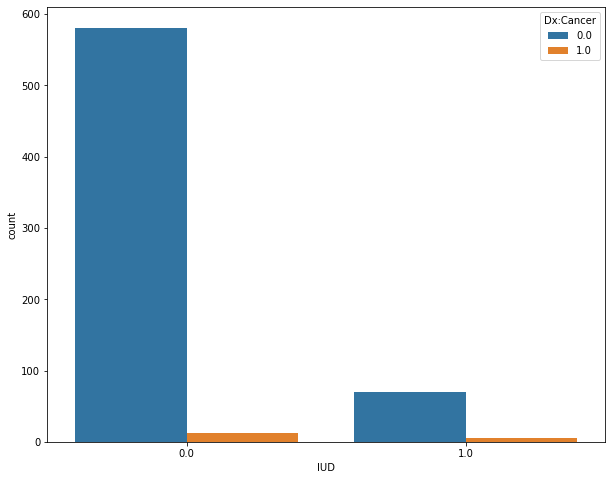

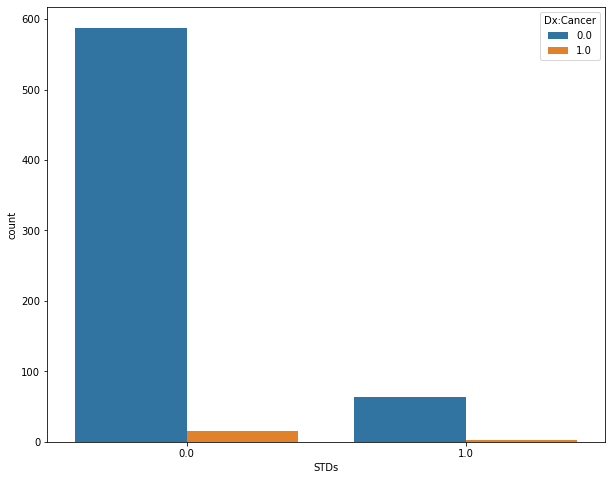

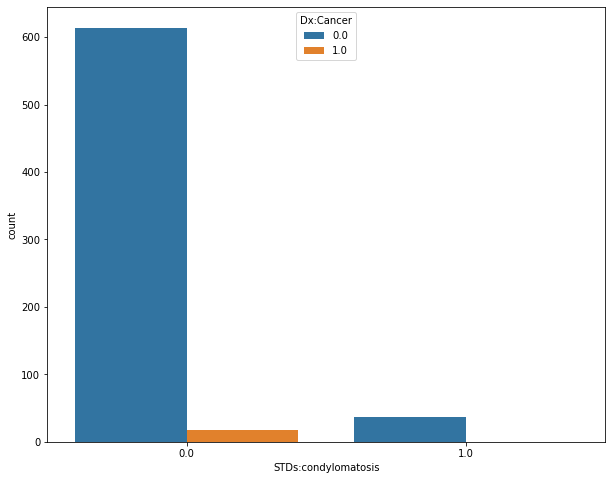

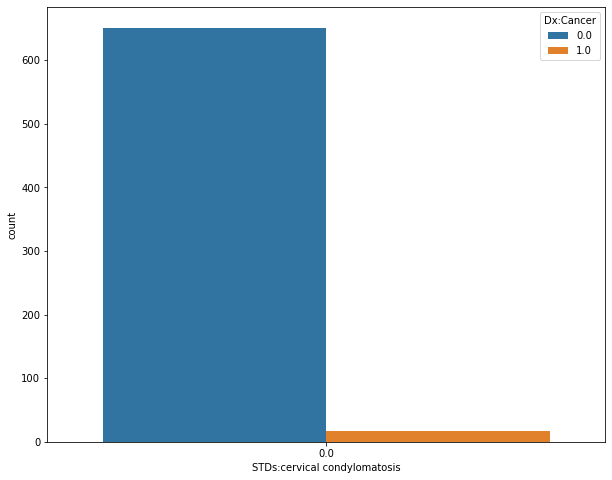

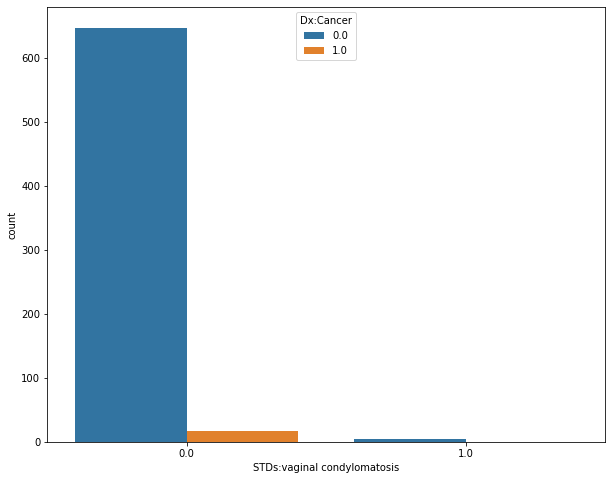

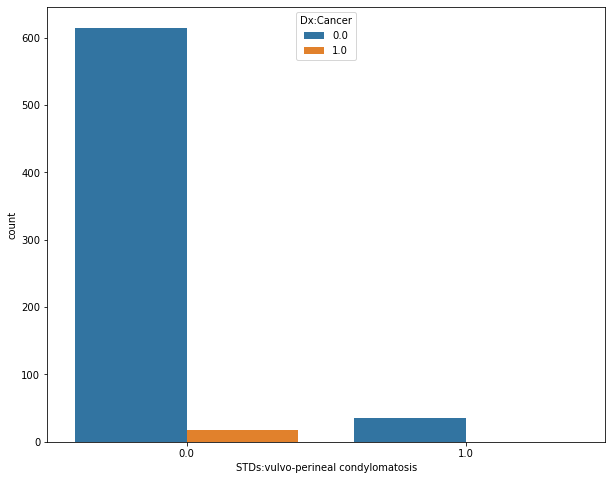

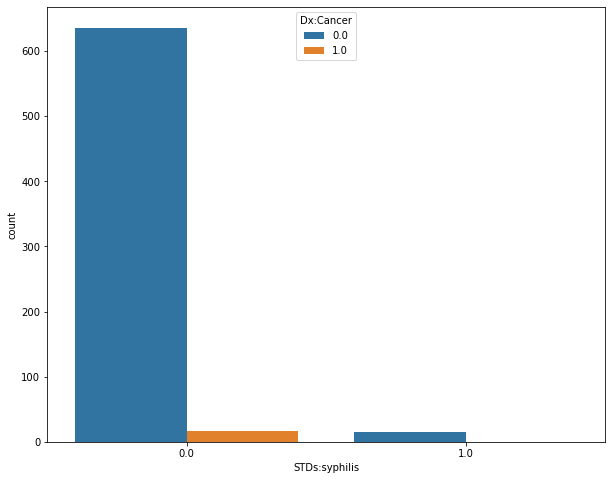

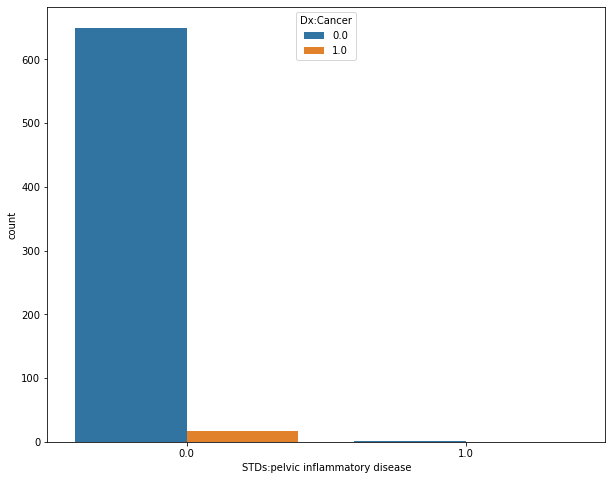

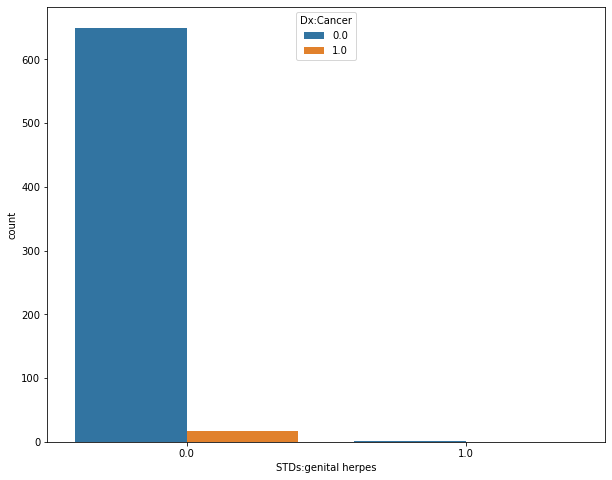

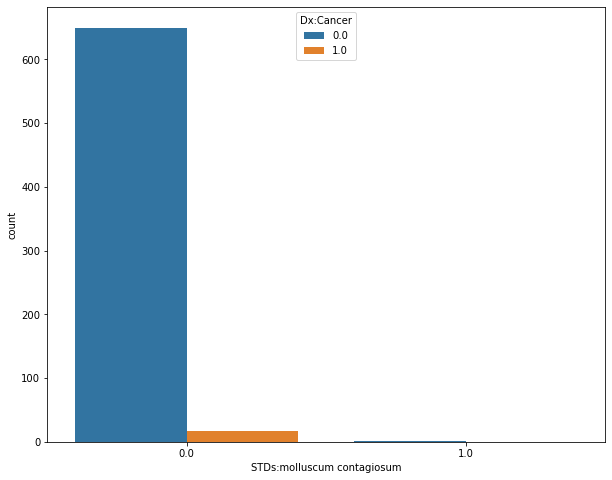

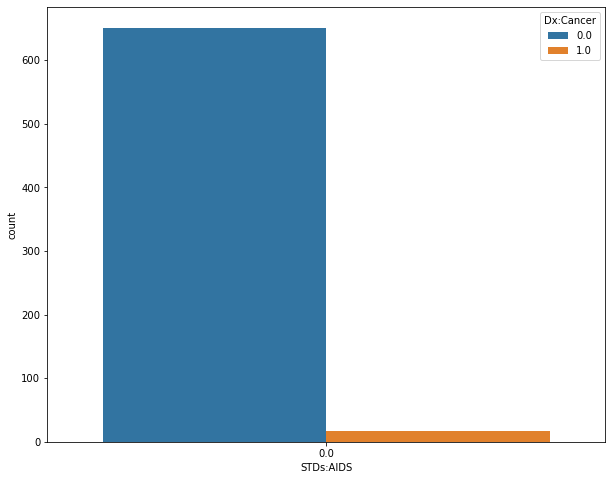

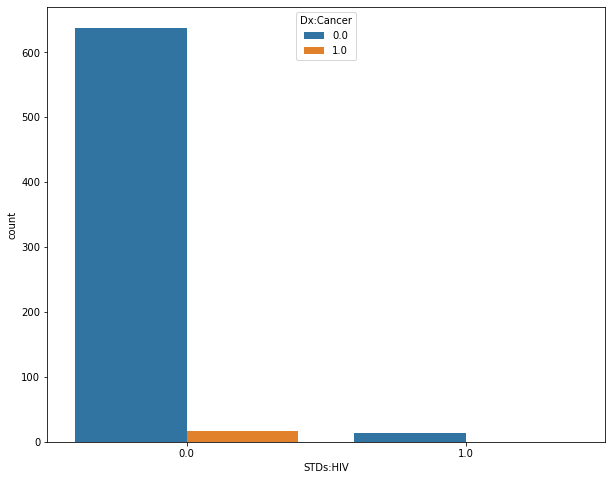

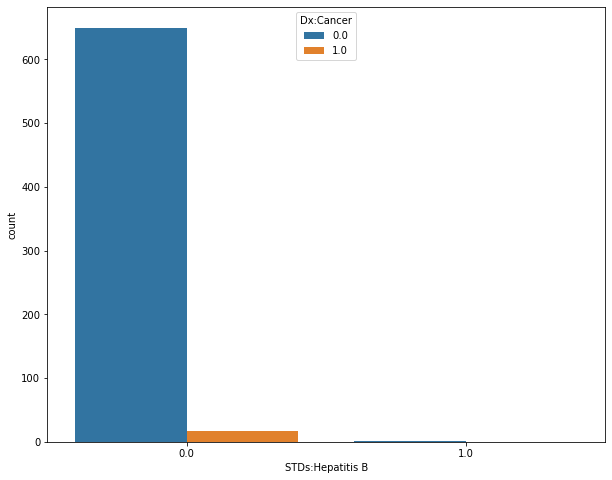

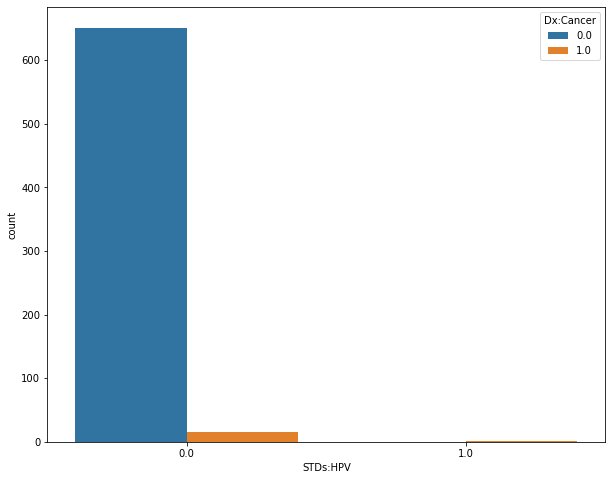

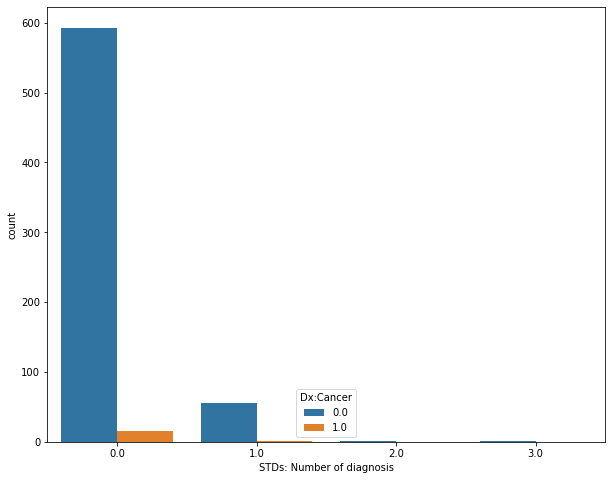

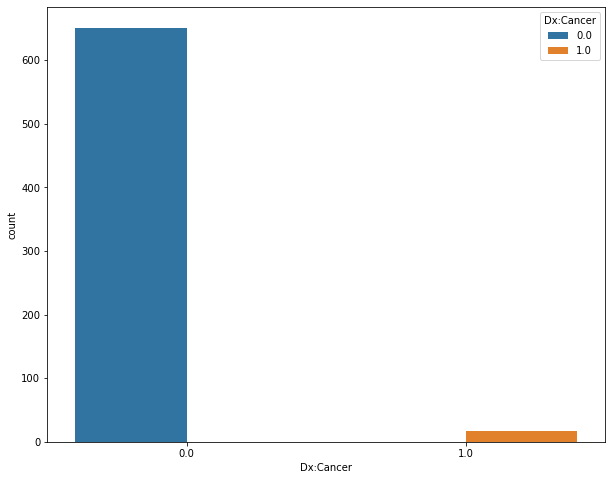

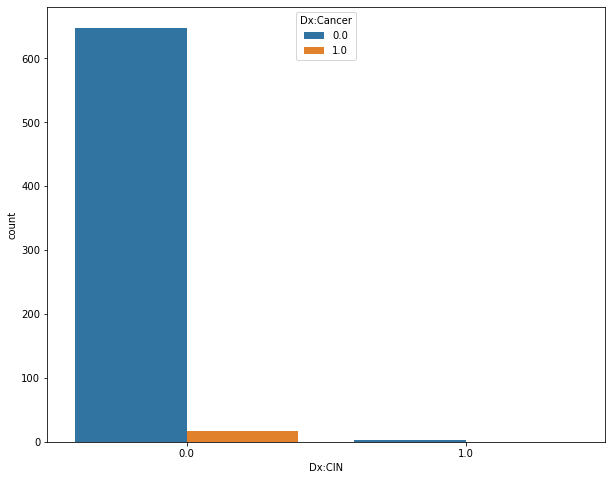

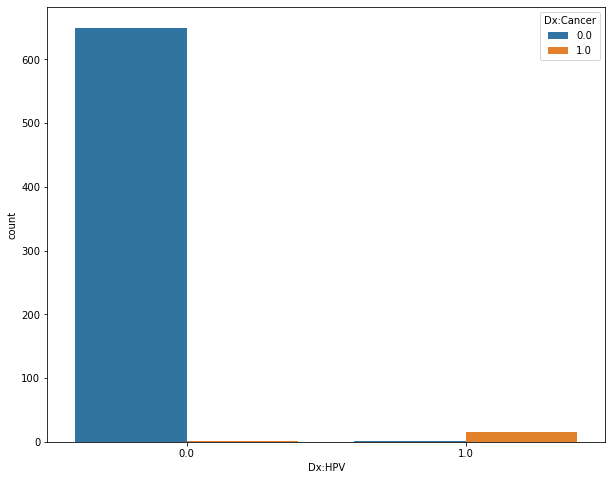

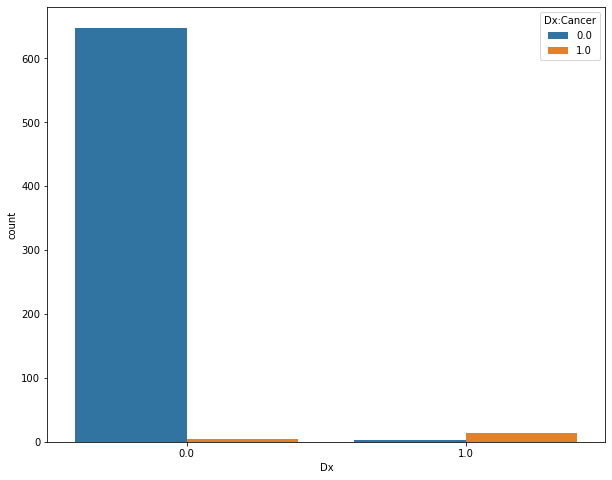

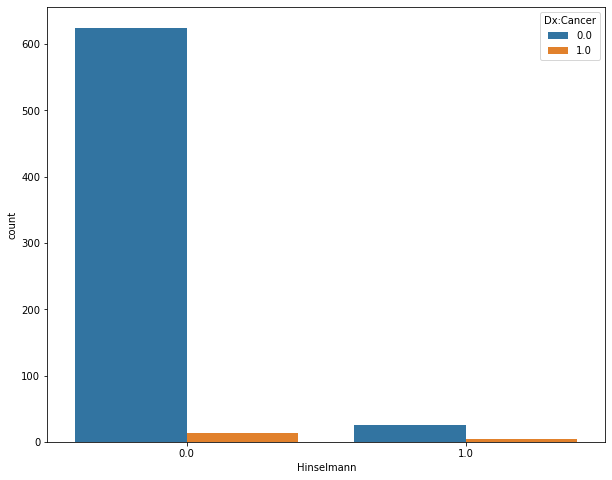

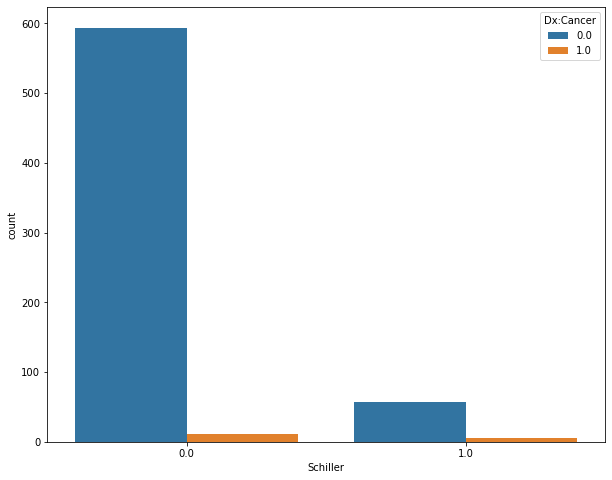

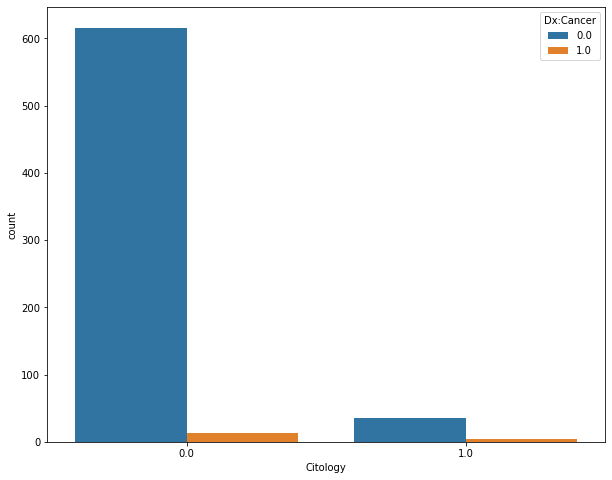

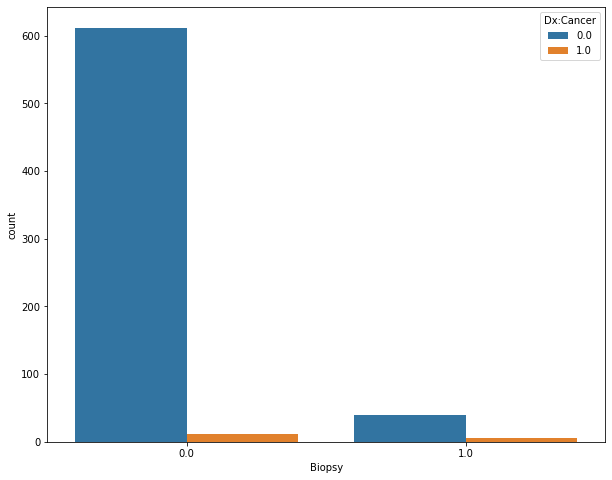

In [11]:
for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(x= i, hue = "Dx:Cancer", data= df)
    

### As we can see, the Hormonal Contraceptives and HPV have more significant effect on Cervical Cancer 

In [ ]:
 sns.countplot(x= "Hormonal Contraceptives", hue = "Dx:Cancer", data= df)

## Data Visualization 3

<Figure size 1080x1080 with 0 Axes>

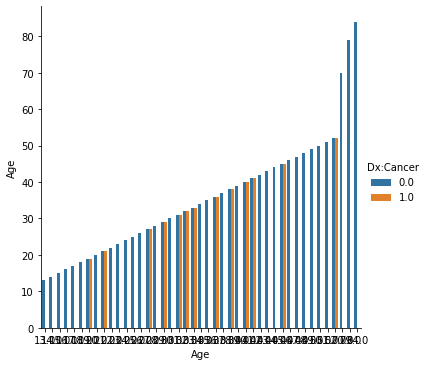

<Figure size 1080x1080 with 0 Axes>

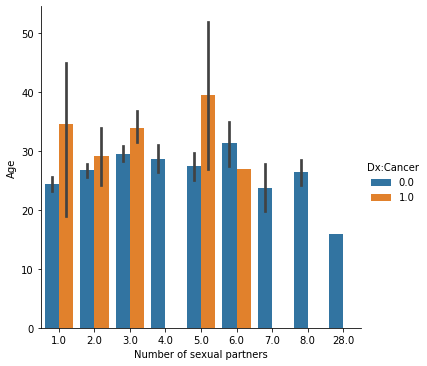

<Figure size 1080x1080 with 0 Axes>

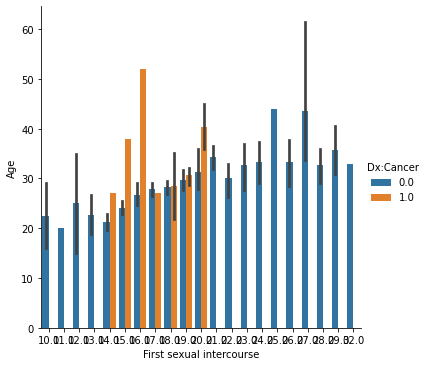

<Figure size 1080x1080 with 0 Axes>

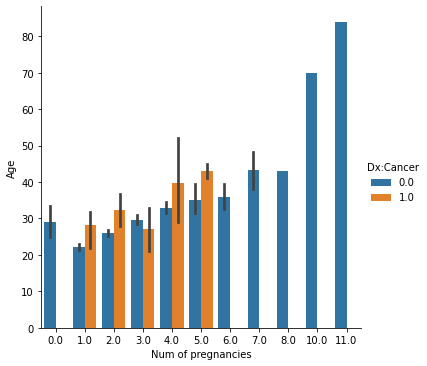

<Figure size 1080x1080 with 0 Axes>

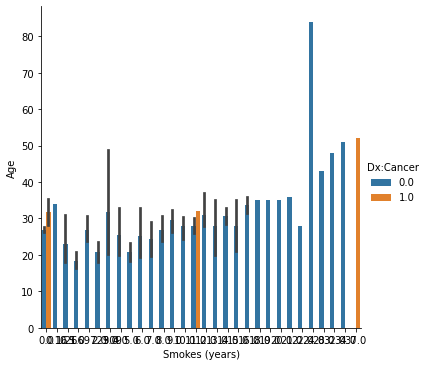

<Figure size 1080x1080 with 0 Axes>

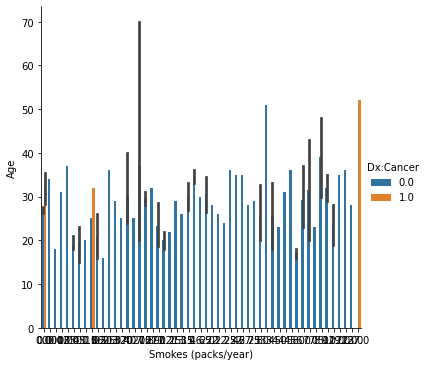

<Figure size 1080x1080 with 0 Axes>

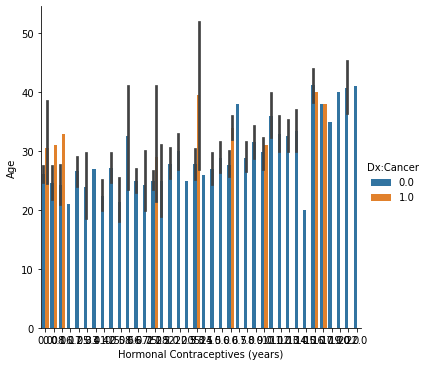

<Figure size 1080x1080 with 0 Axes>

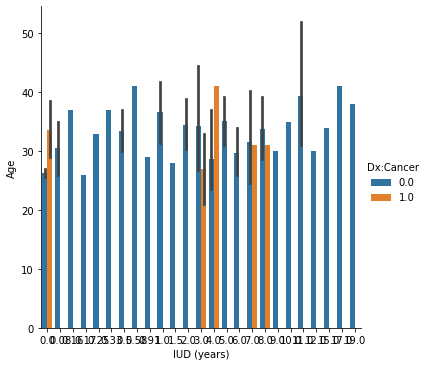

<Figure size 1080x1080 with 0 Axes>

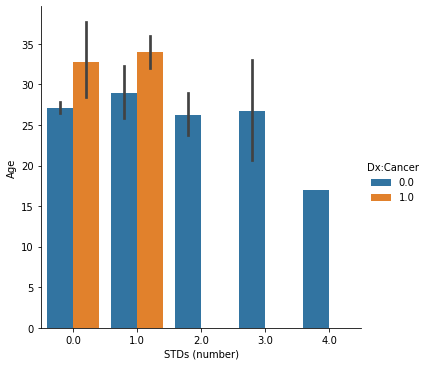

In [14]:
for i in numer_cols:
    plt.figure(figsize=(15,15))
    sns.catplot(x = i, y = "Age", hue = "Dx:Cancer", data= df, kind = 'bar')


### It looks like that people who has around 1 to 5 kids have higher probablility to get cancer. Also people who the first sexual intercourse happened betwen 14 to 20 also become the higher risk population, which both may have association with age.

<AxesSubplot:xlabel='First sexual intercourse', ylabel='Num of pregnancies'>

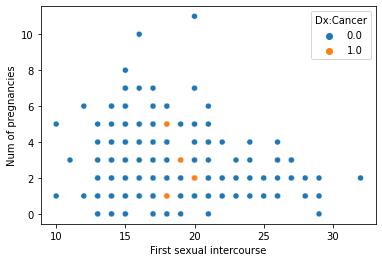

In [15]:
sns.scatterplot(x='First sexual intercourse',hue='Dx:Cancer',y='Num of pregnancies',data=df)

<AxesSubplot:xlabel='First sexual intercourse', ylabel='Age'>

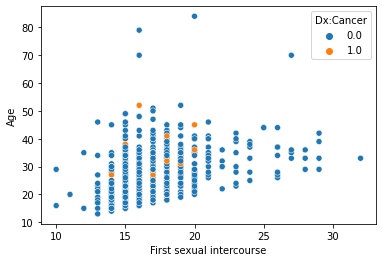

In [16]:
sns.scatterplot(x='First sexual intercourse',hue='Dx:Cancer',y='Age',data=df)

<AxesSubplot:xlabel='Age', ylabel='Num of pregnancies'>

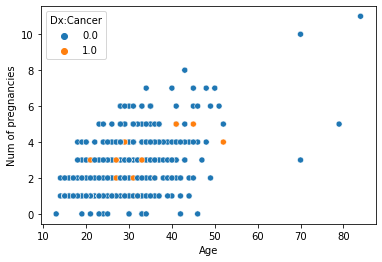

In [17]:
sns.scatterplot(x='Age',hue='Dx:Cancer',y='Num of pregnancies',data=df)

#### It looks like age has higher possible to effect the result of cancer. Let's test it

#### Cancer and Age. Based on our analysis, we know that First sexual intercourse and Num of pregnancies both have relationship with Age.We will include them in the next.

<AxesSubplot:xlabel='Dx:Cancer', ylabel='count'>

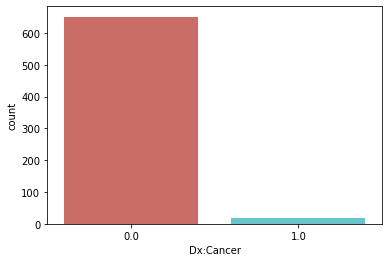

In [18]:
sns.countplot(x = "Dx:Cancer", data = df, palette ="hls")

In [19]:
non_cancer = len(df[df["Dx:Cancer"] == 0])
cancer = len(df[df["Dx:Cancer"] == 1])

In [20]:
per_cer = cancer/(cancer + non_cancer)
per_noncer = non_cancer/(cancer + non_cancer)

In [22]:
cols = ['Num of pregnancies', "Age", 'First sexual intercourse']
X_input = df[cols]
Y_output = df["Dx:Cancer"]

#### Model 1

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_output,X_input)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.123734
         Iterations 8
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    -0.044  
Dependent Variable:    Dx:Cancer           AIC:                 171.3091
Date:                  2021-03-25 02:06    BIC:                 184.8219
No. Observations:      668                 Log-Likelihood:      -82.655 
Df Model:              2                   LL-Null:             -79.190 
Df Residuals:          665                 LLR p-value:         1.0000  
Converged:             1.0000              Scale:               1.0000  
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Num of pregnancies       -0.2550   0.1831 -1.3925 0

##### We can see that P value for Age feature is small than 0.05, which we can infer that age has a higher effect on the rate of Cervical Cancer. P value for Num of pregnancies is more than 0.1, so let's remove it to build anthoer model 

#### Model 2

In [24]:
import statsmodels.api as sm
cols = [ "Age", 'First sexual intercourse']
X_input = df[cols]
logit_model=sm.Logit(Y_output,X_input)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.125243
         Iterations 8
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    -0.056  
Dependent Variable:    Dx:Cancer           AIC:                 171.3245
Date:                  2021-03-25 02:07    BIC:                 180.3331
No. Observations:      668                 Log-Likelihood:      -83.662 
Df Model:              1                   LL-Null:             -79.190 
Df Residuals:          666                 LLR p-value:         1.0000  
Converged:             1.0000              Scale:               1.0000  
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Age                       0.0395   0.0217  1.8226 0

##### P value for Age is even smaller. This is great. We can infer that Age is a big effect for women's cervical health, # Model session
## Above just some data exploration, we get some informations from a brand new dataset. Next, we are going to get in one of most important part -- Data Modeling
#### I will use different ways to build our model, then by evaluation, we go with the better one.

# Model session
## Above just some data exploration, we get some informations from a brand new dataset. Next, we are going to get in one of most important part -- Data Modeling
#### I will use different ways to build our model, then by evaluation, we go with the better one.

## Let's start with Logistic Regression 
1. logit[π] = log (􏰂π􏰃/(1−π)) =β0 +β1x1 +···+βkxk
2. maximum likelihood estimation 
3. Because we are going to assume that each variable is indepent, then we need to check the whether there is correlation during modeling by using logistic regression



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.model_selection as model_selection


### Let's divide data into training datasets, validation datasets, and test datasets first

In [38]:
cols = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)', 'Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
X_input = df[cols]
Y_output = df["Dx:Cancer"]

In [42]:
import sklearn.model_selection as model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df[cols], df["Dx:Cancer"], train_size=0.75,test_size=0.25, random_state=101)
X_train, X_val, Y_train, Y_val =  model_selection.train_test_split(X_train, Y_train, train_size=0.75,test_size=0.25, random_state=101)

## Feature Scalling 

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

## Modeling - Logistic Regression, KNN, SVC, Kernal SVC, Naive Bayes, Decision Tree, Random Forest

In [44]:
# Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 20)
classifier1.fit(X_train, Y_train)

# Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 20)
classifier3.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 20)
classifier4.fit(X_train, Y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 20)
classifier6.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 20)
classifier7.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=20)

### Cross validation choose model

In [45]:
Y_chocie1 = classifier1.predict(X_val)
Y_chocie2 = classifier2.predict(X_val)
Y_chocie3 = classifier3.predict(X_val)
Y_chocie4 = classifier4.predict(X_val)
Y_chocie5 = classifier5.predict(X_val)
Y_chocie6 = classifier6.predict(X_val)
Y_chocie7 = classifier7.predict(X_val)

##### Check Acuracy

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm1 = confusion_matrix(Y_val, Y_chocie1,normalize="all").diagonal().sum()
cm2 = confusion_matrix(Y_val, Y_chocie2,normalize="all").diagonal().sum()
cm3 = confusion_matrix(Y_val, Y_chocie3,normalize="all").diagonal().sum() 
cm4 = confusion_matrix(Y_val, Y_chocie4,normalize="all").diagonal().sum()
cm5 = confusion_matrix(Y_val, Y_chocie5,normalize="all").diagonal().sum()
cm6 = confusion_matrix(Y_val, Y_chocie6,normalize="all").diagonal().sum() 
cm7 = confusion_matrix(Y_val, Y_chocie7,normalize="all").diagonal().sum() 

In [74]:
sum_model = [cm1,cm2,cm3,cm4,cm5,cm6,cm7]

In [76]:
index_Max = max(range(len(sum_model)), key=sum_model.__getitem__)

In [77]:
index_Max

1

### Model 2 which is KNN has the best accuracy. 